In [4]:
import os
import re
def extract(file_path):
    
    n_qubits=0
    cpu_mem =0
    gpu_mem = 0
    time=0
    
    
    
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract other information
    qubits_pattern = re.compile(r'num_of_qubits =\s+(\d+)', re.IGNORECASE)
    qubits_match = re.search(qubits_pattern, content)
    if qubits_match:
        num_qubits = int(qubits_match.group(1))
        n_qubits = num_qubits
        # print("Number of qubits:", num_qubits)


    time_pattern = re.compile(r'time consumed: ([0-9.]+)s', re.IGNORECASE)
    time_match = re.search(time_pattern, content)
    if time_match:
        time_consumed = float(time_match.group(1))
        time = float(time_consumed)
        # print("Time consumed:", time_consumed, "s")

    cpu_memory_pattern = re.compile(r'CPU Memory usage : \((\d+), (\d+)\)', re.IGNORECASE)
    cpu_memory_match = re.search(cpu_memory_pattern, content)
    if cpu_memory_match:
        cpu_memory_usage = (int(cpu_memory_match.group(1)), int(cpu_memory_match.group(2)))
        # print(cpu_memory_usage[1]/1000000)
        # print("CPU Memory usage:", cpu_memory_usage)
        # cpu_mem=float(cpu_memory_usage[1]/(2**20))
        cpu_mem=round(cpu_memory_usage[1] / (2 ** 20), 2)
        # cpu_mem=float(cpu_memory_usage[1]/(10**6))

    gpu_memory_pattern = re.compile(r'GPU memory usage: (\d+) MiB', re.IGNORECASE)
    gpu_memory_match = re.search(gpu_memory_pattern, content)
    if gpu_memory_match:
        gpu_memory_usage = int(gpu_memory_match.group(1))
        gpu_mem = gpu_memory_usage
        # print("GPU Memory usage:", gpu_memory_usage, "MiB")
    
    return n_qubits,time,cpu_mem,gpu_mem,cpu_mem+gpu_mem


In [5]:
data = {}

y_runtime_pennylane = []
y_memory_pennylane_cpu = []


device = 'automatic'

# Specify the folder path
folder_path = '../qiskit/outputs/'+device

# List all files in the folder
files = os.listdir(folder_path)

# Run the extract function on each file
for file in files:
    file_path = os.path.join(folder_path, file)
    # print(file_path)
    info=extract(file_path)
    if(info[1]!=0):
        # print(info)
        data[info[0]]=[info[1],info[2]]
        
print(data)
import pandas as pd
sorted_data = dict(sorted(data.items()))
df = pd.DataFrame.from_dict(sorted_data, orient='index', columns=['Runtime(Seconds)', 'Memory(MiB)'])
df.index.name = 'Key'

filename = 'qiskit.'+device+'.xlsx'
df.to_excel(filename)
print(f"Data saved to {filename}")

{14: [351.49945, 12288.33], 12: [21.748128, 768.3], 10: [1.744293, 48.27], 13: [86.323968, 3072.32], 8: [0.299967, 5.35], 11: [6.013869, 192.28], 7: [0.17488, 4.59], 6: [0.093368, 4.39], 9: [0.632187, 12.25], 5: [0.069202, 4.34], 4: [0.120374, 4.32]}
Data saved to qiskit.automatic.xlsx


[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[4.32, 4.34, 4.39, 4.59, 5.35, 12.25, 48.27, 192.28, 768.3, 3072.32, 12288.33]


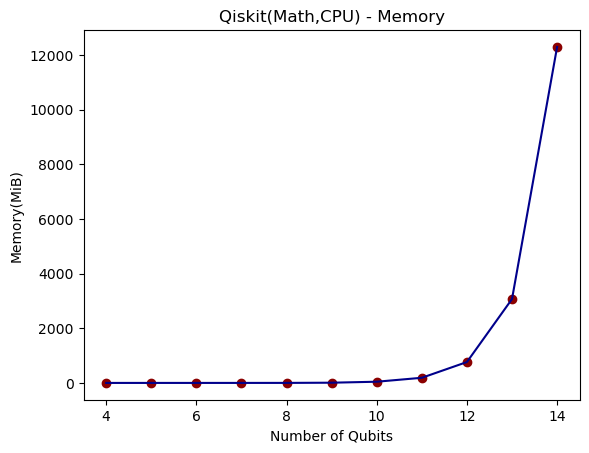

In [6]:
import matplotlib.pyplot as plt

# Extract x and y values from dict1
x1 = list(data.keys())
x1.sort()
y1 = [data[x][1] for x in x1]
print(x1)
print(y1)


# Plot the data points
# plt.plot(x1, y1, label='Pennylane(default.qubit)',color='darkblue')
plt.plot(x1, y1,color='darkblue')

# Add data points for dict1
plt.scatter(x1, y1, color='darkred')


# Add labels and title
plt.xlabel('Number of Qubits')
# plt.ylabel('Runtime(s)')
plt.ylabel('Memory(MiB)')
# plt.title('Qiskit(Math,CPU) - Runtime')
plt.title('Qiskit(Math,CPU) - Memory')

# Show the plot
plt.show()